# Coronavirus COVID-19, MERS and SARS Genome Analysis

### Objective of this notebook

In this notebook, we will interpret, analyze the **COVID-19 DNA sequence data**, and try to get as many insights regarding the proteins that made it up. Later will compare COVID-19 DNA with **MERS** and **SARS** and we’ll understand the relationship among them.

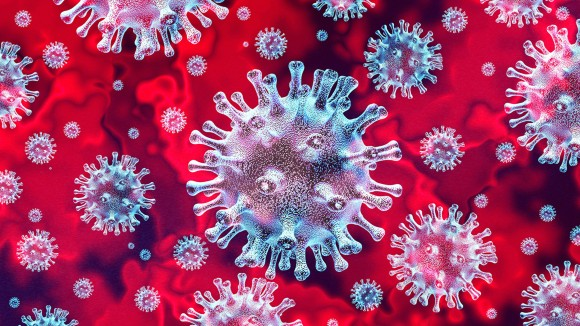

The emerging global infectious COVID-19 coronavirus disease by novel **Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2)** presents critical fulminations to global public health and the economy since it was identified in late December 2019 in China.


Coronaviruses are a large family of viruses that can cause illnesses ranging widely in severity. The first known severe illness caused by a coronavirus appeared with the 2003 **Severe Acute Respiratory Syndrome (SARS)** epidemic in China. A second outbreak of severe illness originated in 2012 in Saudi Arabia with the **Middle East Respiratory Syndrome (MERS)**. And now the ongoing outbreak of COVID-19.


“By comparing the available genome sequence data for known coronavirus strains, we can firmly determine that COVID-19 originated through natural processes,” said Kristian Andersen, Ph.D., an associate professor of immunology and microbiology at Scripps Research and corresponding author on the paper.

#### What are coronaviruses?

The coronaviruses are members of a family of enveloped viruses that replicate in the cytoplasm of animal host cells. They are identified by the presence of a single-stranded plus-sense RNA genome((+)ssRNA classification of viruses) about 30 kb in length that has a 5′ cap structure and 3′ polyadenylation tract. (Larget known virus).


Now let us play with the COVID2–19 DNA sequence data using python.


To start with, install Python packages like Biopython and squiggle will help you when dealing with biological sequence data in Python.

In [ ]:
!pip install biopython
!pip install Squiggle

### Load the basic libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coronavirus-accession-sars-mers-cov2/mers.fasta
/kaggle/input/coronavirus-accession-sars-mers-cov2/sars.fasta
/kaggle/input/coronavirus-accession-sars-mers-cov2/cov2.fasta
/kaggle/input/coronavirus-genome-sequence/MN908947.fna
/kaggle/input/coronavirus-genome-sequence/A_new_coronavirus_associated_with_human_respirator.pdf
/kaggle/input/coronavirus-genome-sequence/MN908947.txt


We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

In [2]:
from Bio import SeqIO
for sequence in SeqIO.parse('../input/coronavirus-genome-sequence/MN908947.fna', "fasta"):
    print(sequence.seq)
    print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

So it produces the sequence and length of the sequence.

Loading Complementary DNA Sequence into an alignable file.

In [3]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('../input/coronavirus-genome-sequence/MN908947.fna', "fasta")
DNAsequence

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

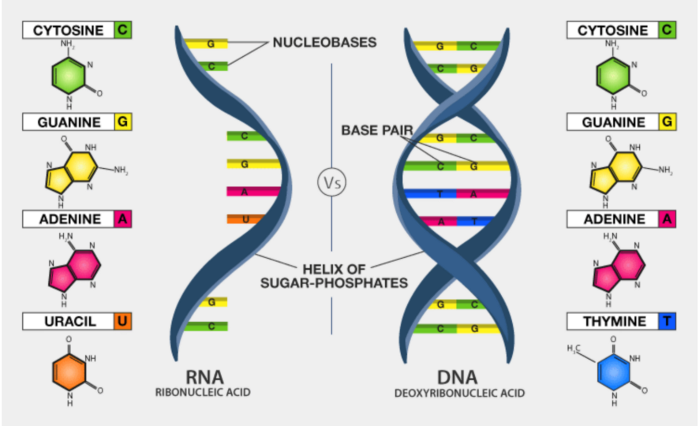

Since input sequence is FASTA (DNA), and Coronavirus is RNA type of virus, we need to:

1. Transcribe DNA to RNA (ATTAAAGGTT… => AUUAAAGGUU…)

2. Translate RNA to Amino acid sequence (AUUAAAGGUU… => IKGLYLPR*Q…)

In the current scenario, the .fna file starts with ATTAAAGGTT, then we call transcribe() so T (thymine) is replaced with U (uracil), so we get the RNA sequence which starts with AUUAAAGGUU.

The `transcribe()` method will convert the DNA to mRNA.

In [4]:
DNA = DNAsequence.seq#Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.

In [5]:
print(mRNA)

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [6]:
print('Size : ',len(mRNA))

Size :  29903


The difference between the DNA and the mRNA is just that the bases T (for Thymine) are replaced with U (for Uracil).


Next, we need to translate the mRNA sequence to amino-acid sequence using translate() method, we get something like IKGLYLPR*Q ( is so-called STOP codon, effectively is a separator for proteins).

In [7]:
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

In [8]:
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Length of Protein: 9967
Length of Original mRNA: 29903


In our scenario, the sequence looks like this: **IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA,** where:


**IKGLYLPR** encodes the first protein (every letter encodes single amino-acid) **QTNQLSISCRSVL** encodes the second protein, and so on.


Note that there are fewer sequences in the protein than the mRNA that is because 3 mRNA’s are used to produce a single subunit of a protein, known as an amino acid, using the codon table shown below. The * is used to denote a stop codon, in these regions the protein has finished its full length. Many of these occur frequently and result in short lengths of protein, more likely than not these play a little biological role and will be excluded in further analyses.


#### Okay, first understand what are Genetic code and DNA codon?


The Genetic code is the set of rules used by living cells to translate information encoded within genetic material (DNA or mRNA sequences of nucleotide triplets, or codons) into proteins.


The standard genetic code is traditionally represented as an RNA codon table because, when proteins are made in a cell by ribosomes, it is mRNA that directs protein synthesis. The mRNA sequence is determined by the sequence of genomic DNA. Here are some features of codons:

Most codons specify an amino acid

Three “stop” codons mark the end of a protein

One “start” codon, AUG, marks the beginning of a protein and also encodes the amino acid methionine.

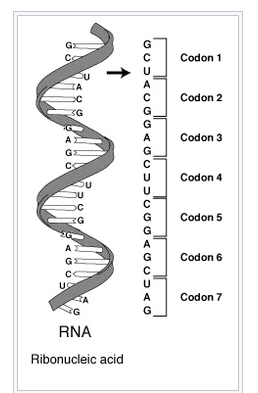

A series of codons in part of a messenger RNA (mRNA) molecule. Each codon consists of three nucleotides, usually corresponding to a single amino acid. The nucleotides are abbreviated with the letters A, U, G, and C. This is mRNA, which uses U (uracil). DNA uses T (thymine) instead. This mRNA molecule will instruct a ribosome to synthesize a protein according to this code. Source



In [9]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Let’s now identify all the Proteins (chains of amino acids), basically separating at the stop codon, marked by *. Then let’s remove any sequence less than 20 amino acids long, as this is the smallest known functional protein (if curious).

In [19]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))

def conv(item):
    return len(item)

def to_str(item):
    return str(item)

df['sequence_str'] = df[0].apply(to_str)

df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))

functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


Protein Analysis With The Protparam Module In Biopython using ProtParam.


Available Tools in ProtParam:

**count_amino_acids**: Simply count the number times an amino acid is repeated in the protein sequence.

**get_amino_acids_percent**: The same as only returns the number in the percentage of the entire sequence.

**molecular_weight**: Calculates the molecular weight of a protein.

**aromaticity**: Calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180).

**flexibility**: Implementation of the flexibility method of Vihinen et al. (1994, Proteins, 19, 141-149).

**isoelectric_point**: This method uses the module IsoelectricPoint to calculate the pI of a protein.

**secondary_structure_fraction**: This method returns a list of the fraction of amino acids that tend to be in helix, turn, or sheet.

Amino acids in Helix: V, I, Y, F, W, L.

Amino acids in Turn: N, P, G, S.

Amino acids in Sheet: E, M, A, L.

The list contains 3 values: [Helix, Turn, Sheet].

In [31]:
#This cell will produce very lengthy output :D

from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]: 
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI) 
    
    try:
        print("Amino acids percent = ", str(X.get_amino_acids_percent()))
    except ZeroDivisionError:
        pass
    print("Molecular weight = ", MW)
    
    try:
        print("Aromaticity = ", X.aromaticity()) 
    except ZeroDivisionError:
        pass
    print("Flexibility = ", X.flexibility()) 
    
    try:
        print("Secondary structure fraction = ", X.secondary_structure_fraction())
    except ZeroDivisionError:
        pass



Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.125, 'H': 0.0, 'I': 0.125, 'K': 0.125, 'L': 0.25, 'M': 0.0, 'N': 0.0, 'P': 0.125, 'Q': 0.0, 'R': 0.125, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.125}
Molecular weight =  959.1858
Aromaticity =  0.125
Flexibility =  []
Secondary structure fraction =  (0.5, 0.25, 0.25)


Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 2, 'R': 1, 'S': 3, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.07692307692307693, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.07692307692307693, 'K': 0.0, 'L': 0.15384615384615385, 'M': 0.0, 'N': 0.07692307692307693, 'P': 0.0, 'Q': 0.15384615384615385, 'R': 0.07692307692307693, 'S'

Secondary structure fraction =  (0.1111111111111111, 0.6666666666666666, 0.0)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 1, 'V': 2, 'W': 0, 'Y': 1}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.1, 'I': 0.0, 'K': 0.1, 'L': 0.2, 'M': 0.0, 'N': 0.0, 'P': 0.1, 'Q': 0.0, 'R': 0.1, 'S': 0.0, 'T': 0.1, 'V': 0.2, 'W': 0.0, 'Y': 0.1}
Molecular weight =  1225.4821
Aromaticity =  0.1
Flexibility =  [0.9620833333333333]
Secondary structure fraction =  (0.5, 0.1, 0.2)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 1.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0,

Flexibility =  [1.0057142857142856, 0.9544166666666669, 0.96025, 0.9554285714285714, 0.9765000000000001, 0.9515119047619051, 1.0015119047619048, 0.9422499999999998, 0.9828095238095236, 0.998107142857143, 0.9716190476190476, 0.9583095238095238, 0.9650357142857143, 0.9944880952380953, 0.9539285714285713, 0.9700714285714285, 0.9901666666666668, 0.9670238095238096, 0.9501785714285714, 0.9581666666666667, 0.9740833333333334]
Secondary structure fraction =  (0.4666666666666667, 0.16666666666666666, 0.13333333333333333)


Protein of Interest =  {'A': 1, 'C': 0, 'D': 0, 'E': 1, 'F': 3, 'G': 0, 'H': 1, 'I': 0, 'K': 0, 'L': 5, 'M': 0, 'N': 0, 'P': 0, 'Q': 1, 'R': 3, 'S': 0, 'T': 0, 'V': 0, 'W': 1, 'Y': 2}
Amino acids percent =  {'A': 0.05555555555555555, 'C': 0.0, 'D': 0.0, 'E': 0.05555555555555555, 'F': 0.16666666666666666, 'G': 0.0, 'H': 0.05555555555555555, 'I': 0.0, 'K': 0.0, 'L': 0.2777777777777778, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.05555555555555555, 'R': 0.16666666666666666, 'S': 0.0, 

Molecular weight =  1551.6529
Aromaticity =  0.3076923076923077
Flexibility =  [1.0040119047619047, 0.9916666666666668, 0.9684642857142857, 0.9731547619047619]
Secondary structure fraction =  (0.46153846153846156, 0.38461538461538464, 0.15384615384615385)


Protein of Interest =  {'A': 1, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 1, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 1, 'S': 1, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.25, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.25, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.25, 'S': 0.25, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}
Molecular weight =  445.5138
Aromaticity =  0.0
Flexibility =  []
Secondary structure fraction =  (0.25, 0.25, 0.5)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Molecular weight =  18.0153


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 1, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 1.0, 'Y': 0.0}
Molecular weight =  204.2252
Aromaticity =  1.0
Flexibility =  []
Secondary structure fraction =  (1.0, 0.0, 0.0)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 1, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 1.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}
Molecular weight =  165.1891
Aromaticity =  1.0
Flexibility =  []
Se

Aromaticity =  0.0
Flexibility =  []
Secondary structure fraction =  (1.0, 0.0, 1.0)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 1, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.3333333333333333, 'M': 0.0, 'N': 0.0, 'P': 0.3333333333333333, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.3333333333333333, 'W': 0.0, 'Y': 0.0}
Molecular weight =  327.4191
Aromaticity =  0.0
Flexibility =  []
Secondary structure fraction =  (0.6666666666666666, 0.3333333333333333, 0.3333333333333333)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.5, 'K': 0.0, '

Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 1, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 0, 'M': 1, 'N': 0, 'P': 0, 'Q': 0, 'R': 1, 'S': 1, 'T': 1, 'V': 2, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.1111111111111111, 'D': 0.0, 'E': 0.0, 'F': 0.1111111111111111, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.1111111111111111, 'L': 0.0, 'M': 0.1111111111111111, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.1111111111111111, 'S': 0.1111111111111111, 'T': 0.1111111111111111, 'V': 0.2222222222222222, 'W': 0.0, 'Y': 0.0}
Molecular weight =  1070.3292000000001
Aromaticity =  0.1111111111111111
Flexibility =  []
Secondary structure fraction =  (0.3333333333333333, 0.1111111111111111, 0.1111111111111111)


Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 2, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 1, 'M': 1, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 1, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.25, 'G': 0.0, 'H': 0.0, 'I': 0.

### Now let us compare the similarity among COVID-19/COV2, MERS, and SARS.


Load the DNA sequence file (FASTA) each of SARS, MERS, and COVID-19.

In [32]:
#Comparing Human Coronavirus RNA
from Bio import pairwise2

SARS = SeqIO.read("../input/coronavirus-accession-sars-mers-cov2/sars.fasta", "fasta")
MERS = SeqIO.read("../input/coronavirus-accession-sars-mers-cov2/mers.fasta", "fasta")
COV2 = SeqIO.read("../input/coronavirus-accession-sars-mers-cov2/cov2.fasta", "fasta")

Before comparing the similarity let us visualize the DNA each of COV2, SARS, and MERS respectively.

In [36]:
#Squiggle wont work in Kaggle kernels, you need to run this command on terminal.

Squiggle cov2.fasta sars.fasta mers.fasta --method=gates --separate

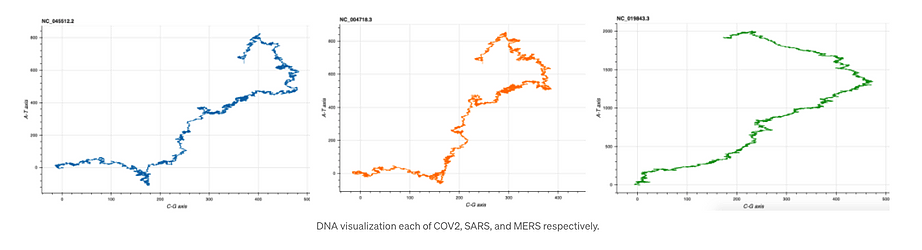

As we can observe the DNA structure of COV2 and SARS are almost identical, while that of MERS is a little different than the two.


Now let us use the Sequence alignment technique to compare the similarity among all the DNA sequences.


Sequence alignment is the process of arranging two or more sequences (of DNA, RNA, or protein sequences) in a specific order to identify the region of similarity between them.

Identifying the similar region enables us to infer a lot of information like what traits are conserved between species, how close different species genetically are, how species evolve, etc.


Pairwise sequence alignment compares only two sequences at a time and provides the best possible sequence alignments. Pairwise is easy to understand and exceptional to infer from the resulting sequence alignment.


Biopython provides a special module, Bio.pairwise2 to identify the alignment sequence using the pairwise method. Biopython applies the best algorithm to find the alignment sequence and it is par with other software.

In [37]:
# Alignments using pairwise2 alghoritm

SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)

MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)

MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)

SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


Phylogenetic analysis of the complete viral genome (29,903 nucleotides) revealed that the COVID-19 virus was most closely related (83.3% nucleotide similarity) to a group of SARS-like coronaviruses (genus Betacoronavirus, subgenus Sarbecovirus) that had previously been found in bats in China.

Plot the results:

<BarContainer object of 3 artists>

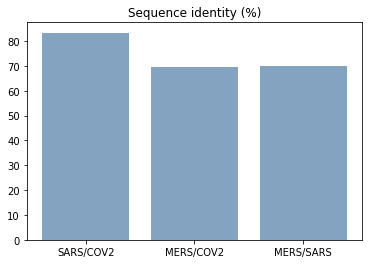

In [42]:
# Plot the data
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y,color=(0.2, 0.4, 0.6, 0.6))

### So we can conclude that COVID-19 is closely related to SARS rather then MERS.